# Exercice 4:  Mécanisme Self-Attention - Variation des Paramètres


1) Variation de la dimensionnalité des embeddings

L'influence des embeddings sure mécanisme d’attention.

Nous testons trois tailles (4, 8 et 16) sur la phrase  Les transformers sont puissants.

Pour chaque dimension, les matrices Q, K, V et les poids d’attention sont calcule et visualise.

Variance des embeddings: 0.007428
Variance des scores: 0.000000
Variance des poids: 0.000000
Variance des embeddings: 0.009882
Variance des scores: 0.000000
Variance des poids: 0.000000
Variance des embeddings: 0.011472
Variance des scores: 0.000000
Variance des poids: 0.000000


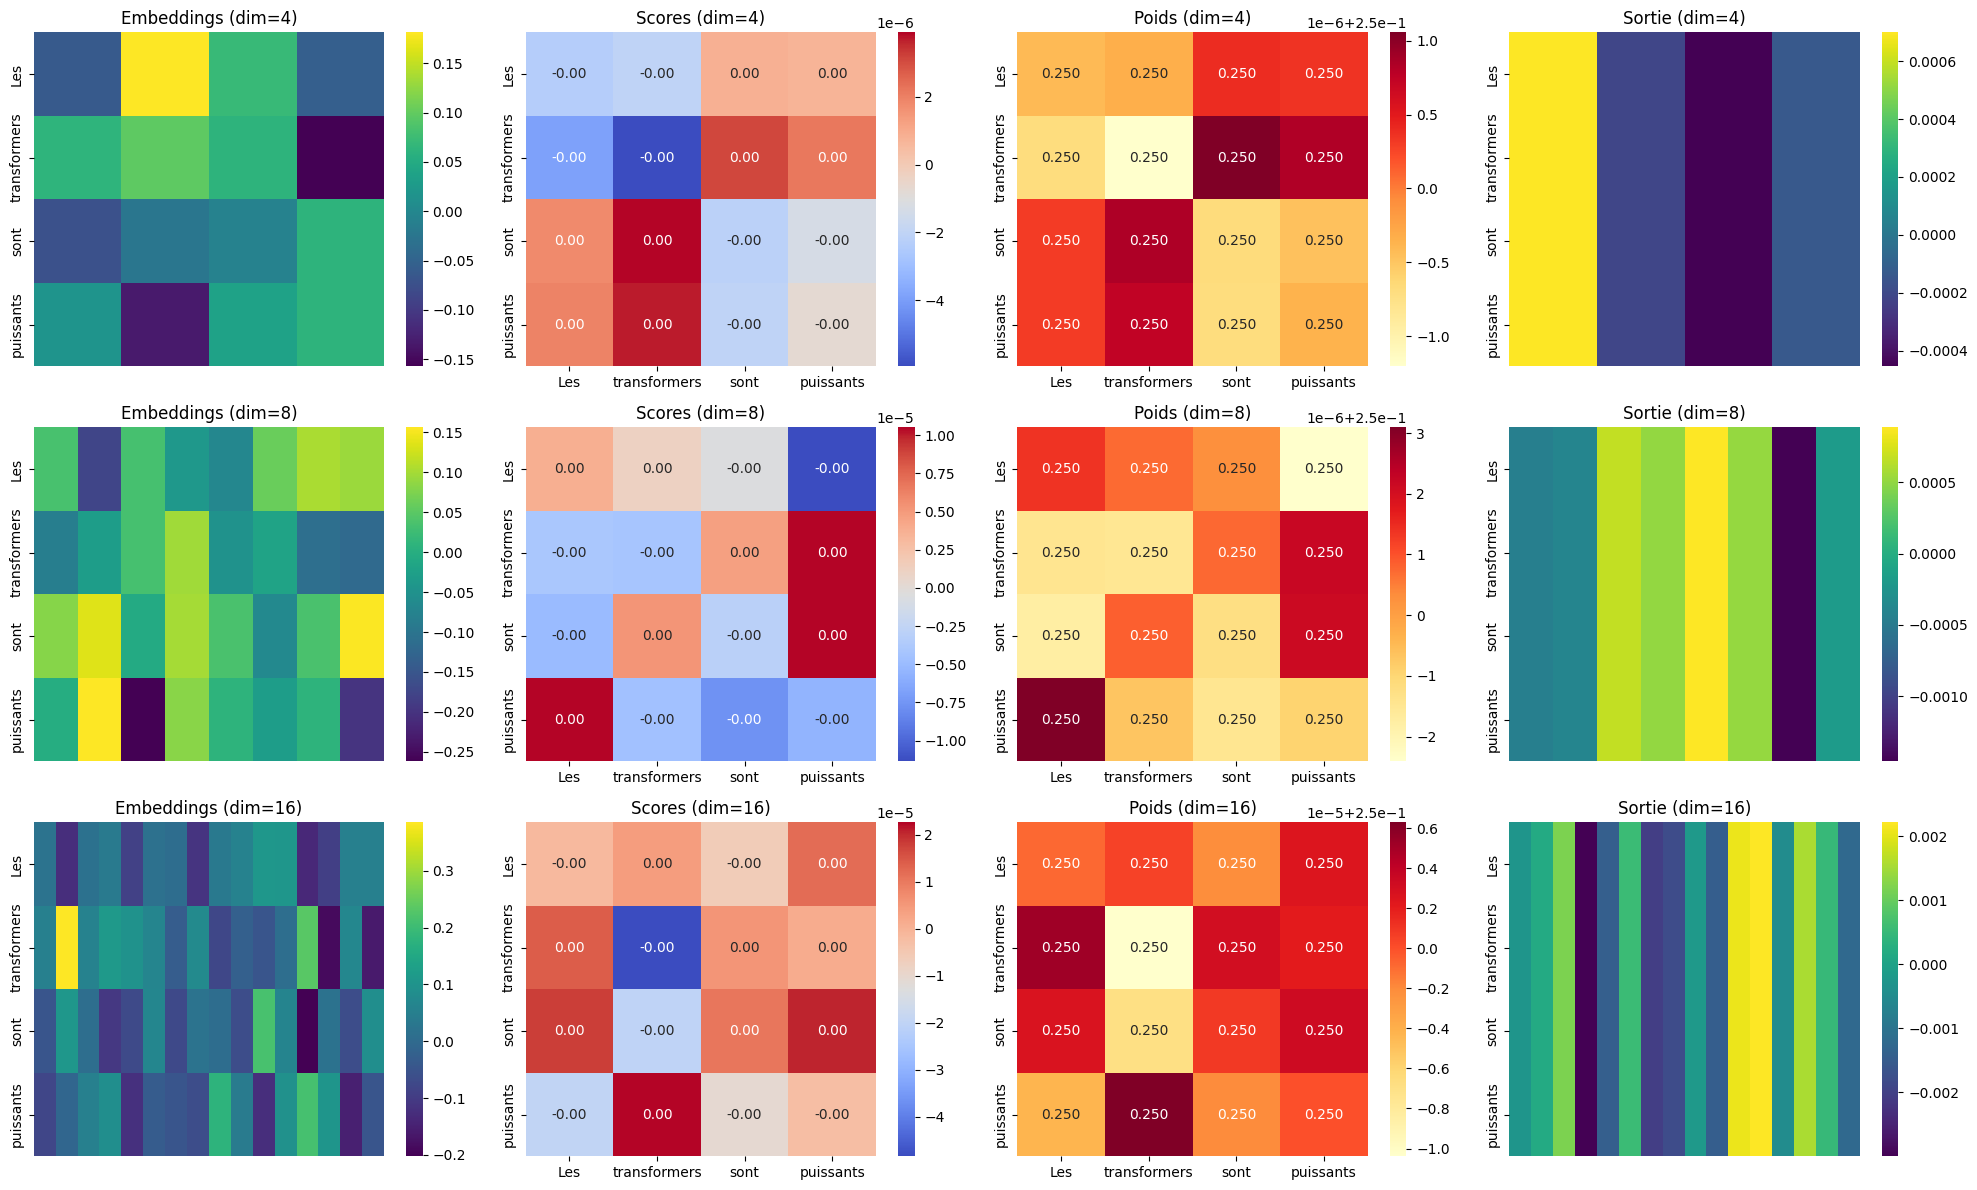

COMPARAISON DES DIMENSIONS

Dimension 4:
  - Variance scores: 0.000000
  - Écart-type poids: 0.000001
  - Min/Max sortie: [-0.0005, 0.0007]

Dimension 8:
  - Variance scores: 0.000000
  - Écart-type poids: 0.000002
  - Min/Max sortie: [-0.0015, 0.0009]

Dimension 16:
  - Variance scores: 0.000000
  - Écart-type poids: 0.000004
  - Min/Max sortie: [-0.0030, 0.0022]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

phrase = "Les transformers sont puissants".split()
longueur_seq = len(phrase)
dimensions = [4, 8, 16]

resultats = {}

for dim in dimensions:
    
    embeddings = np.random.randn(longueur_seq, dim) * 0.1
    
    np.random.seed(42)
    Wq = np.random.randn(dim, dim) * 0.01
    Wk = np.random.randn(dim, dim) * 0.01
    Wv = np.random.randn(dim, dim) * 0.01
    
    Q = np.dot(embeddings, Wq)
    K = np.dot(embeddings, Wk)
    V = np.dot(embeddings, Wv)
    
    scores = np.dot(Q, K.T) / np.sqrt(dim)
    poids_attention = softmax(scores)
    sortie_attention = np.dot(poids_attention, V)
    
    resultats[dim] = {
        'embeddings': embeddings,
        'Q': Q,
        'K': K,
        'V': V,
        'scores': scores,
        'poids': poids_attention,
        'sortie': sortie_attention
    }
    
    print(f"Variance des embeddings: {np.var(embeddings):.6f}")
    print(f"Variance des scores: {np.var(scores):.6f}")
    print(f"Variance des poids: {np.var(poids_attention):.6f}")

fig = plt.figure(figsize=(20, 12))

for idx, dim in enumerate(dimensions):
    res = resultats[dim]
    
    plt.subplot(3, 4, idx*4 + 1)
    sns.heatmap(res['embeddings'], cmap='viridis', 
                xticklabels=False, yticklabels=phrase)
    plt.title(f'Embeddings (dim={dim})')
    
    plt.subplot(3, 4, idx*4 + 2)
    sns.heatmap(res['scores'], annot=True, fmt='.2f', 
                cmap='coolwarm', xticklabels=phrase, yticklabels=phrase)
    plt.title(f'Scores (dim={dim})')
    
    plt.subplot(3, 4, idx*4 + 3)
    sns.heatmap(res['poids'], annot=True, fmt='.3f', 
                cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
    plt.title(f'Poids (dim={dim})')
    
    plt.subplot(3, 4, idx*4 + 4)
    sns.heatmap(res['sortie'], cmap='viridis', 
                xticklabels=False, yticklabels=phrase)
    plt.title(f'Sortie (dim={dim})')

plt.tight_layout()
plt.show()

print("COMPARAISON DES DIMENSIONS")
for dim in dimensions:
    print(f"\nDimension {dim}:")
    print(f"  - Variance scores: {np.var(resultats[dim]['scores']):.6f}")
    print(f"  - Écart-type poids: {np.std(resultats[dim]['poids']):.6f}")
    print(f"  - Min/Max sortie: [{np.min(resultats[dim]['sortie']):.4f}, {np.max(resultats[dim]['sortie']):.4f}]")

Les visualisations montrent que lorsque la dimension des embeddings augmente:

Les scores d’attention deviennent  variés, indiquant une plus grande sensibilité aux relations entre les mots.

Les poids d’attention sont uniformes, car les valeurs des embeddings sont aléatoires, mais l'écart-type augmente avec la dimension.



2) Multi-Head Attention avec 4 têtes

Le multi-head attention permet au modèle de comprendre les types de relations entre les mots en même temps, en divisant l’espace d’embedding en plusieurs sous-espaces.

- creer une attention à 4 têtes et la comparer  à celles à 1 et 2 têtes.


Nombre de têtes: 1
Dimension par tête: 16
Shape sortie: (4, 16)

Tête 1:
  Variance poids: 0.000000
  Écart-type poids: 0.000002
Nombre de têtes: 2
Dimension par tête: 8
Shape sortie: (4, 16)

Tête 1:
  Variance poids: 0.000000
  Écart-type poids: 0.000002

Tête 2:
  Variance poids: 0.000000
  Écart-type poids: 0.000002
Nombre de têtes: 4
Dimension par tête: 4
Shape sortie: (4, 16)

Tête 1:
  Variance poids: 0.000000
  Écart-type poids: 0.000002

Tête 2:
  Variance poids: 0.000000
  Écart-type poids: 0.000003

Tête 3:
  Variance poids: 0.000000
  Écart-type poids: 0.000002

Tête 4:
  Variance poids: 0.000000
  Écart-type poids: 0.000002


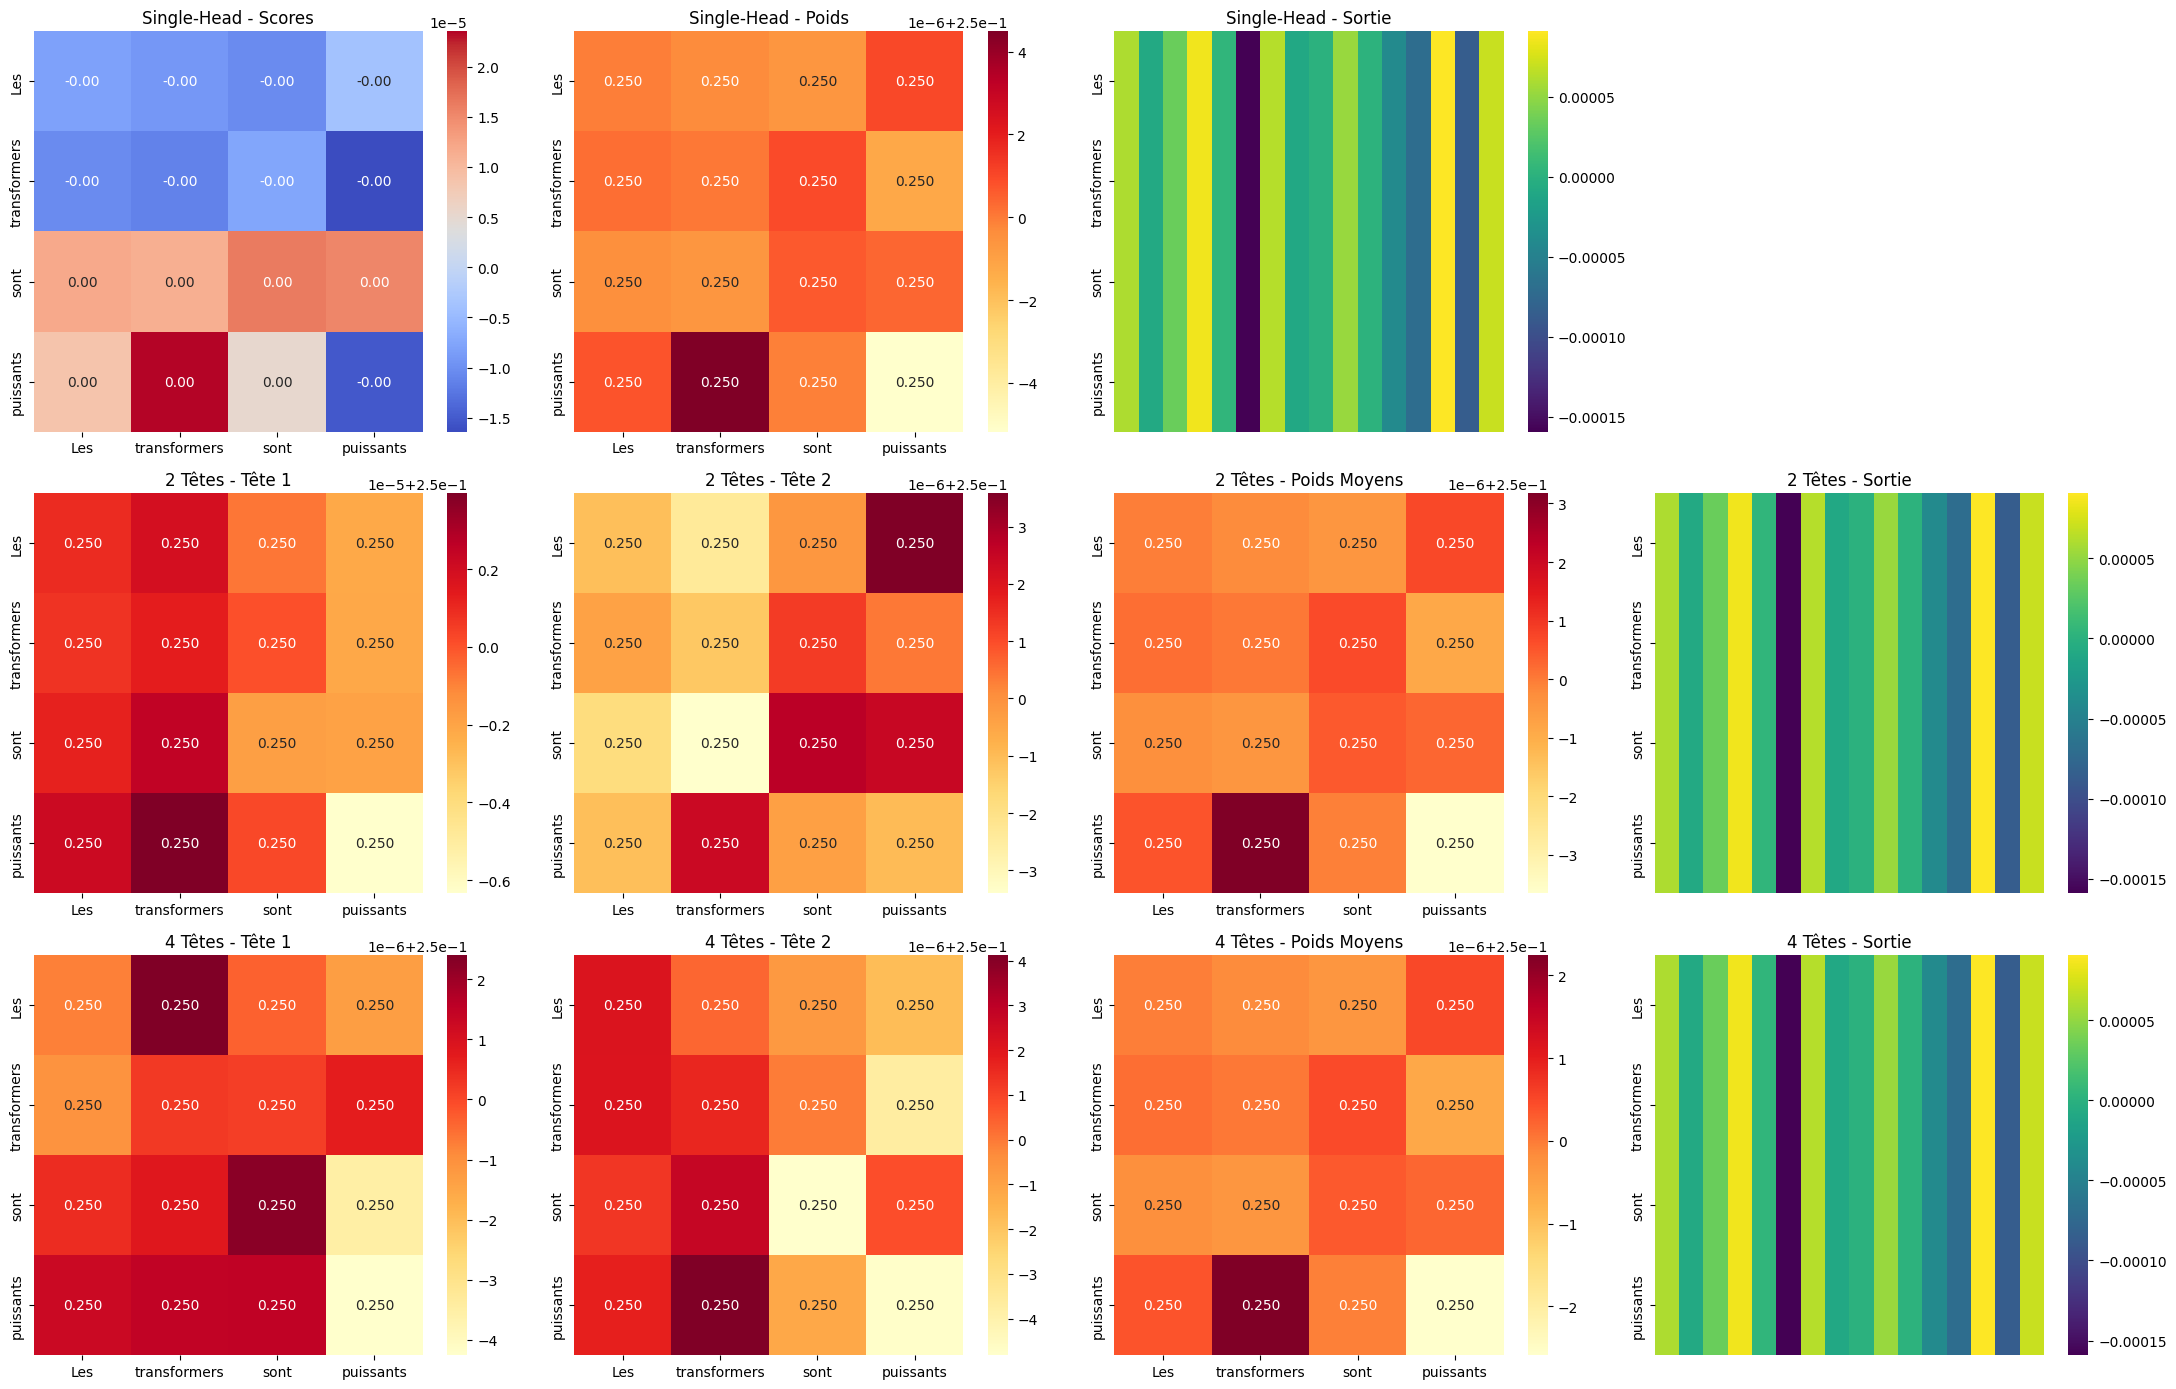

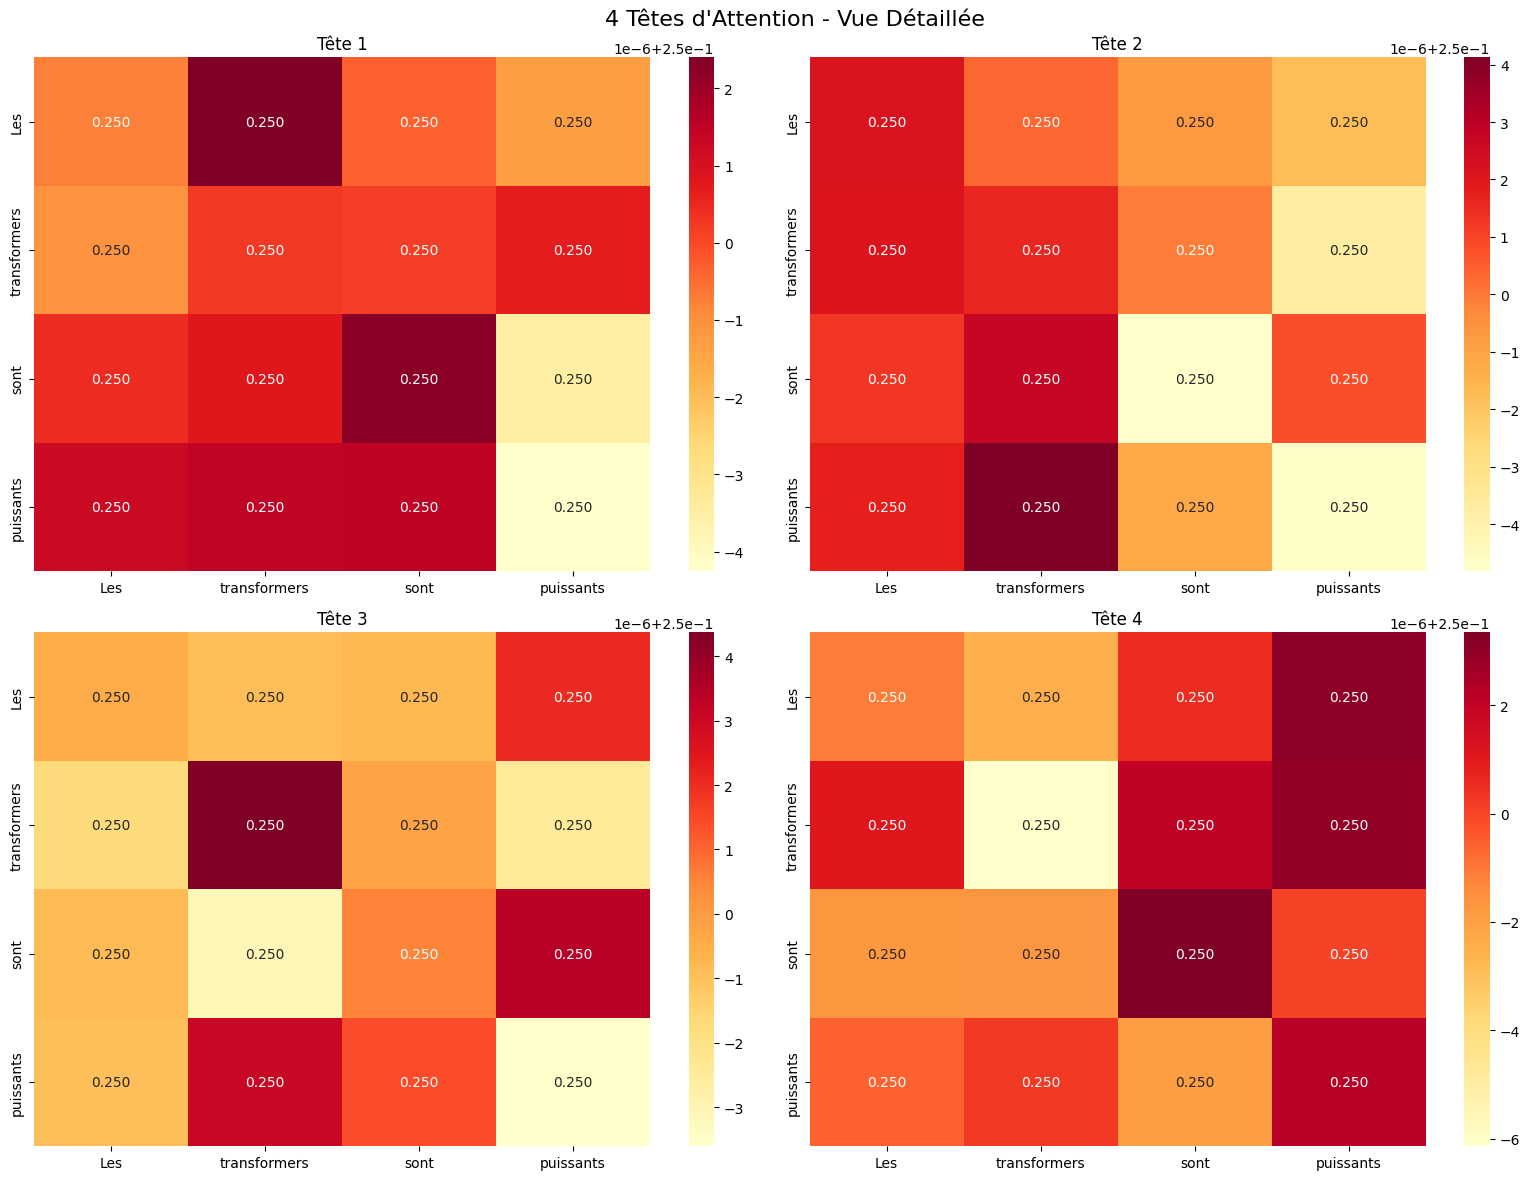


Single-Head:
  - Variance sortie: 0.000000
  - Moyenne abs sortie: 0.000052

2 Têtes:
  - Variance sortie: 0.000000
  - Moyenne abs sortie: 0.000052
  - Diversité entre têtes: 0.000000

4 Têtes:
  - Variance sortie: 0.000000
  - Moyenne abs sortie: 0.000052
  - Diversité entre têtes: 0.000000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def multi_head_attention(embeddings, num_heads, dim_modele):
    longueur_seq = embeddings.shape[0]
    dim_tete = dim_modele // num_heads
    
    np.random.seed(42)
    Wq = np.random.randn(dim_modele, dim_modele) * 0.01
    Wk = np.random.randn(dim_modele, dim_modele) * 0.01
    Wv = np.random.randn(dim_modele, dim_modele) * 0.01
    Wo = np.random.randn(dim_modele, dim_modele) * 0.01
    
    Q = np.dot(embeddings, Wq)
    K = np.dot(embeddings, Wk)
    V = np.dot(embeddings, Wv)
    
    Q_heads = Q.reshape(longueur_seq, num_heads, dim_tete)
    K_heads = K.reshape(longueur_seq, num_heads, dim_tete)
    V_heads = V.reshape(longueur_seq, num_heads, dim_tete)
    
    sorties_tetes = []
    poids_tetes = []
    scores_tetes = []
    
    for h in range(num_heads):
        Q_h = Q_heads[:, h, :]
        K_h = K_heads[:, h, :]
        V_h = V_heads[:, h, :]
        
        scores_h = np.dot(Q_h, K_h.T) / np.sqrt(dim_tete)
        poids_h = softmax(scores_h)
        sortie_h = np.dot(poids_h, V_h)
        
        sorties_tetes.append(sortie_h)
        poids_tetes.append(poids_h)
        scores_tetes.append(scores_h)
    
    sortie_concat = np.concatenate(sorties_tetes, axis=-1)
    sortie_finale = np.dot(sortie_concat, Wo)
    
    return sortie_finale, poids_tetes, scores_tetes

phrase = "Les transformers sont puissants".split()
dim_modele = 16
longueur_seq = len(phrase)

embeddings = np.random.randn(longueur_seq, dim_modele) * 0.1

configs = [
    {'num_heads': 1, 'nom': 'Single-Head'},
    {'num_heads': 2, 'nom': '2 Têtes'},
    {'num_heads': 4, 'nom': '4 Têtes'}
]

resultats = {}

for config in configs:
    num_heads = config['num_heads']
    nom = config['nom']
    

    
    sortie, poids_tetes, scores_tetes = multi_head_attention(embeddings, num_heads, dim_modele)
    
    resultats[nom] = {
        'sortie': sortie,
        'poids_tetes': poids_tetes,
        'scores_tetes': scores_tetes
    }
    
    print(f"Nombre de têtes: {num_heads}")
    print(f"Dimension par tête: {dim_modele // num_heads}")
    print(f"Shape sortie: {sortie.shape}")
    
    for h in range(num_heads):
        print(f"\nTête {h+1}:")
        print(f"  Variance poids: {np.var(poids_tetes[h]):.6f}")
        print(f"  Écart-type poids: {np.std(poids_tetes[h]):.6f}")

fig = plt.figure(figsize=(22, 14))

for idx, config in enumerate(configs):
    nom = config['nom']
    num_heads = config['num_heads']
    res = resultats[nom]
    
    if num_heads == 1:
        plt.subplot(3, 4, idx*4 + 1)
        sns.heatmap(res['scores_tetes'][0], annot=True, fmt='.2f',
                    cmap='coolwarm', xticklabels=phrase, yticklabels=phrase)
        plt.title(f'{nom} - Scores')
        
        plt.subplot(3, 4, idx*4 + 2)
        sns.heatmap(res['poids_tetes'][0], annot=True, fmt='.3f',
                    cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
        plt.title(f'{nom} - Poids')
        
        plt.subplot(3, 4, idx*4 + 3)
        sns.heatmap(res['sortie'], cmap='viridis',
                    xticklabels=False, yticklabels=phrase)
        plt.title(f'{nom} - Sortie')
    else:
        for h in range(min(num_heads, 2)):
            col = idx*4 + h + 1
            plt.subplot(3, 4, col)
            sns.heatmap(res['poids_tetes'][h], annot=True, fmt='.3f',
                        cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
            plt.title(f'{nom} - Tête {h+1}')
        
        plt.subplot(3, 4, idx*4 + 3)
        poids_moyen = np.mean(res['poids_tetes'], axis=0)
        sns.heatmap(poids_moyen, annot=True, fmt='.3f',
                    cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
        plt.title(f'{nom} - Poids Moyens')
        
        plt.subplot(3, 4, idx*4 + 4)
        sns.heatmap(res['sortie'], cmap='viridis',
                    xticklabels=False, yticklabels=phrase)
        plt.title(f'{nom} - Sortie')

plt.tight_layout()
plt.show()

if len(configs) >= 3 and configs[2]['num_heads'] == 4:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('4 Têtes d\'Attention - Vue Détaillée', fontsize=16)
    
    for h in range(4):
        ax = axes[h//2, h%2]
        sns.heatmap(resultats['4 Têtes']['poids_tetes'][h], 
                    annot=True, fmt='.3f', cmap='YlOrRd',
                    xticklabels=phrase, yticklabels=phrase, ax=ax)
        ax.set_title(f'Tête {h+1}')
    
    plt.tight_layout()
    plt.show()


for config in configs:
    nom = config['nom']
    res = resultats[nom]
    print(f"\n{nom}:")
    print(f"  - Variance sortie: {np.var(res['sortie']):.6f}")
    print(f"  - Moyenne abs sortie: {np.mean(np.abs(res['sortie'])):.6f}")
    if len(res['poids_tetes']) > 1:
        diversite = np.std([np.var(p) for p in res['poids_tetes']])
        print(f"  - Diversité entre têtes: {diversite:.6f}")



Les résultats montrent que les poids d’attention sont uniformes (≈ 0.25) pour tous les mots et toutes les têtes,

 ce qui montre que que le modèle ne distingue aucune relation spécifique entre les tokens.
 
  Les variances et écarts-types quasi nuls confirment que les différentes têtes produisent des résultats identiques et redondants => ça indique que le modèle est non entrainé et l’attention est répartie de manière égale
  


3)  Implémentation du Dropout

Le dropout est une méthode de régularisation visant à éviter le surapprentissage en désactivant aléatoirement certaines connexions pendant l’entraînement. 

Dans le mécanisme d’attention, il est appliqué aux poids après le softmax afin de limiter la dépendance à certaines relations et d’améliorer la généralisation du modèle.

 - Implémenter le dropout et  comparer les résultats obtenus avec et sans dropout (taux de 0.1 et 0.3) pour observer son effet sur la distribution des poids d’attention et sur la sortie finale.

Taux de dropout: 0.0
Variance poids : 0.000000
Variance poids après dropout: 0.000000
Variance sortie: 0.000002
Taux de dropout: 0.1
Variance poids : 0.000000
Variance poids après dropout: 0.008439
Variance sortie: 0.000002
Taux de dropout: 0.3
Variance poids : 0.000000
Variance poids après dropout: 0.023916
Variance sortie: 0.000003


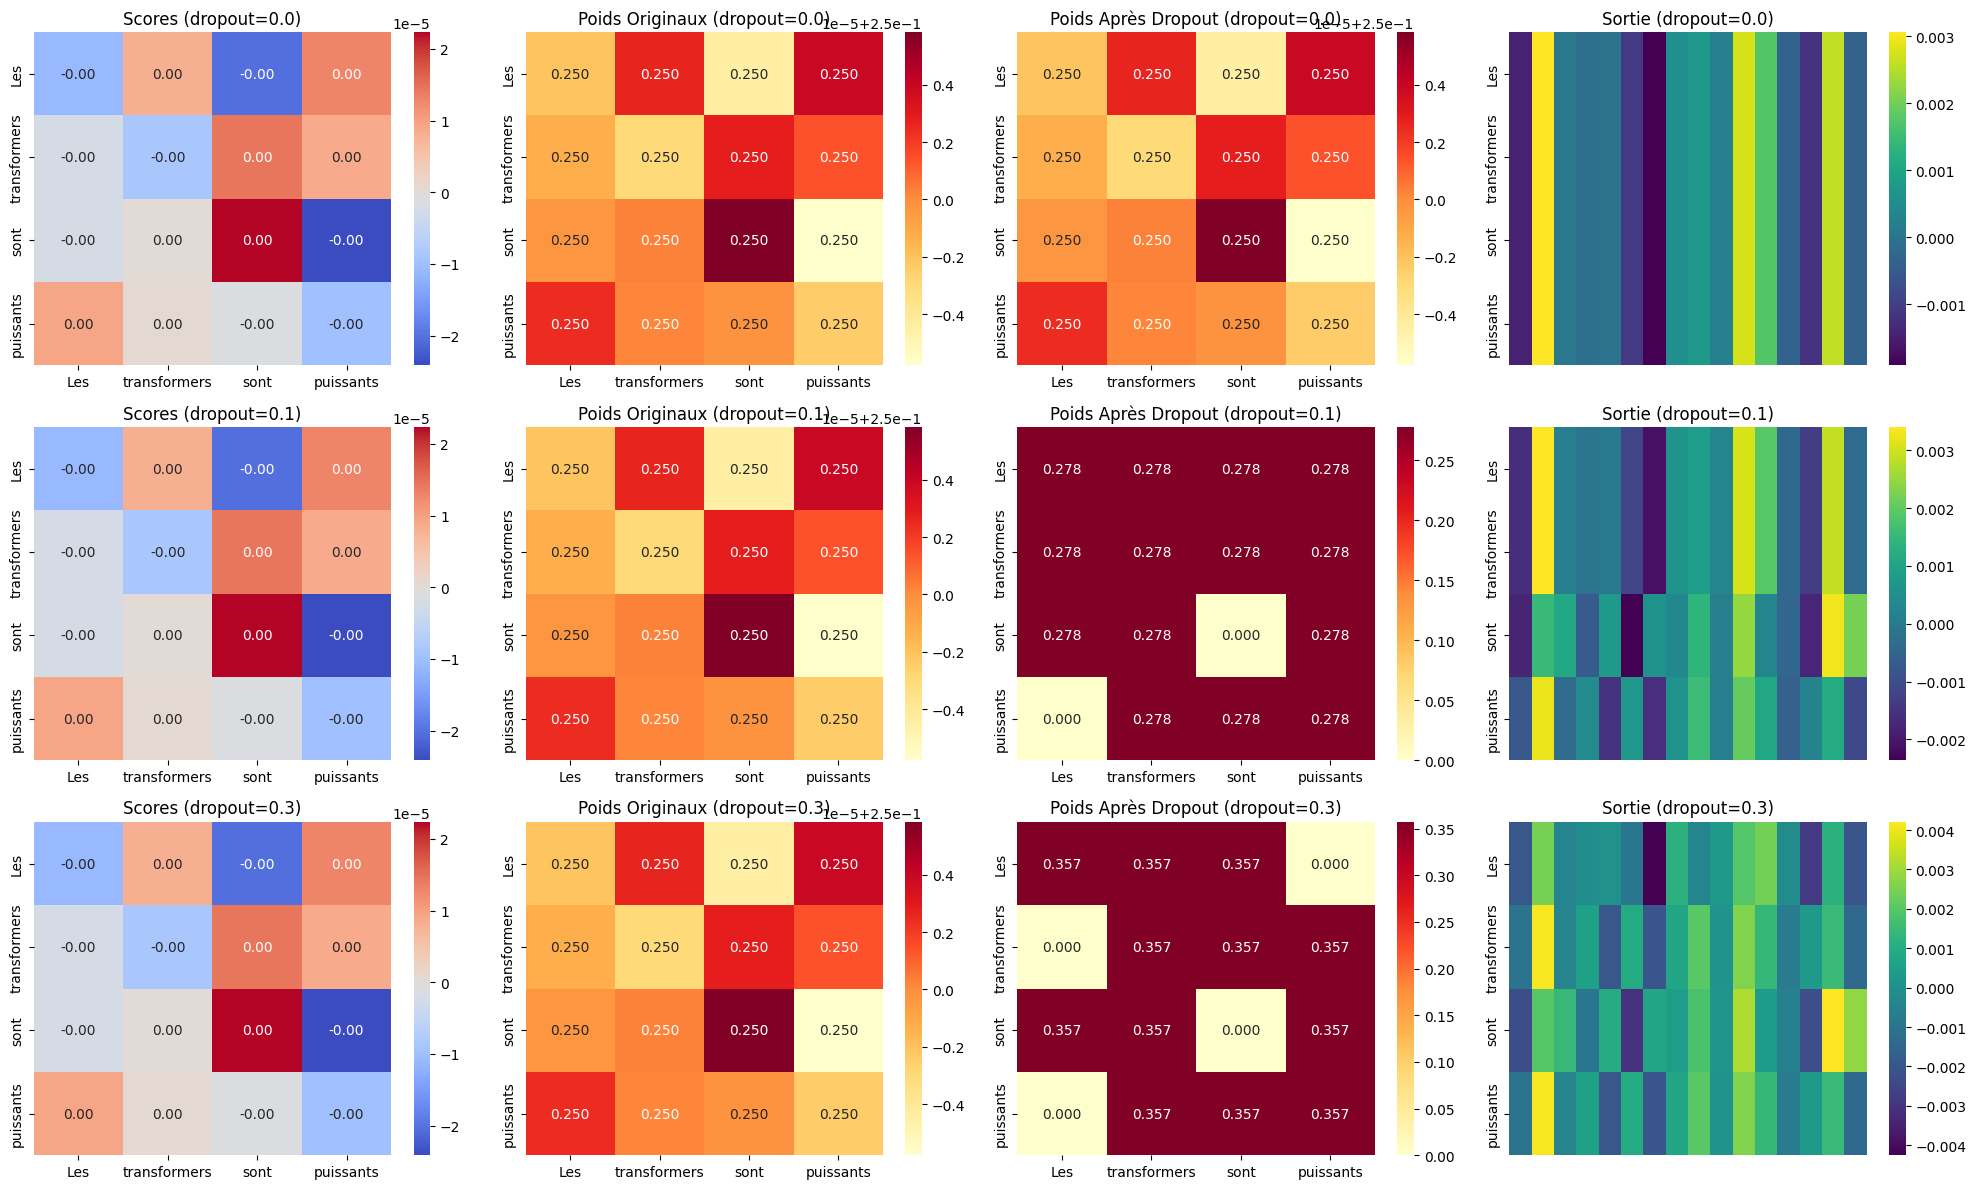

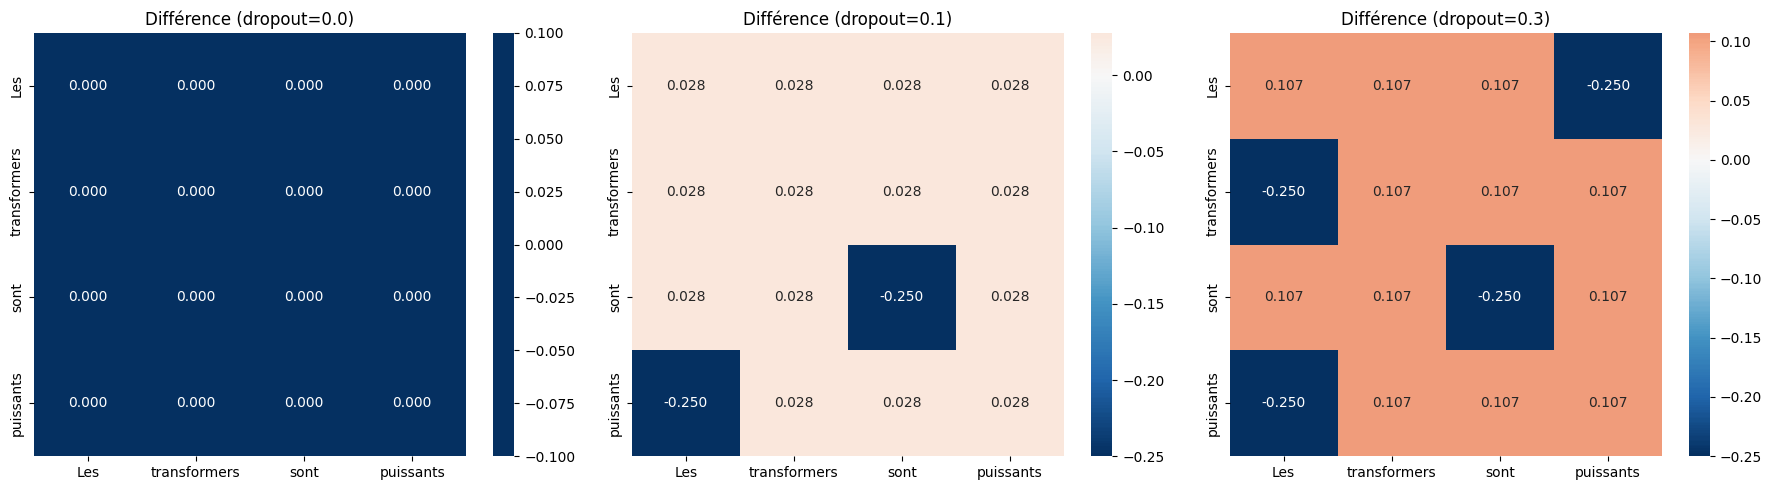

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def dropout(x, taux_dropout, training=True):
    if not training or taux_dropout == 0:
        return x
    
    masque = np.random.binomial(1, 1 - taux_dropout, size=x.shape)
    return (x * masque) / (1 - taux_dropout)

def attention_avec_dropout(embeddings, taux_dropout=0.0, training=True):
    dim_modele = embeddings.shape[1]
    
    np.random.seed(42)
    Wq = np.random.randn(dim_modele, dim_modele) * 0.01
    Wk = np.random.randn(dim_modele, dim_modele) * 0.01
    Wv = np.random.randn(dim_modele, dim_modele) * 0.01
    
    Q = np.dot(embeddings, Wq)
    K = np.dot(embeddings, Wk)
    V = np.dot(embeddings, Wv)
    
    scores = np.dot(Q, K.T) / np.sqrt(dim_modele)
    poids_attention = softmax(scores)
    
    poids_avec_dropout = dropout(poids_attention, taux_dropout, training)
    
    sortie_attention = np.dot(poids_avec_dropout, V)
    
    return {
        'Q': Q,
        'K': K,
        'V': V,
        'scores': scores,
        'poids_originaux': poids_attention,
        'poids_dropout': poids_avec_dropout,
        'sortie': sortie_attention
    }

phrase = "Les transformers sont puissants".split()
dim_modele = 16
longueur_seq = len(phrase)

embeddings = np.random.randn(longueur_seq, dim_modele) * 0.1

taux_dropout_configs = [0.0, 0.1, 0.3]
resultats = {}

for taux in taux_dropout_configs:
    print(f"Taux de dropout: {taux}")
 
    res = attention_avec_dropout(embeddings, taux_dropout=taux, training=True)
    resultats[taux] = res
    
    zeros_pourcent = (np.sum(res['poids_dropout'] == 0) / res['poids_dropout'].size) * 100
    print(f"Variance poids : {np.var(res['poids_originaux']):.6f}")
    print(f"Variance poids après dropout: {np.var(res['poids_dropout']):.6f}")
    print(f"Variance sortie: {np.var(res['sortie']):.6f}")

fig = plt.figure(figsize=(20, 12))

for idx, taux in enumerate(taux_dropout_configs):
    res = resultats[taux]
    
    plt.subplot(3, 4, idx*4 + 1)
    sns.heatmap(res['scores'], annot=True, fmt='.2f',
                cmap='coolwarm', xticklabels=phrase, yticklabels=phrase)
    plt.title(f'Scores (dropout={taux})')
    
    plt.subplot(3, 4, idx*4 + 2)
    sns.heatmap(res['poids_originaux'], annot=True, fmt='.3f',
                cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
    plt.title(f'Poids Originaux (dropout={taux})')
    
    plt.subplot(3, 4, idx*4 + 3)
    sns.heatmap(res['poids_dropout'], annot=True, fmt='.3f',
                cmap='YlOrRd', xticklabels=phrase, yticklabels=phrase)
    plt.title(f'Poids Après Dropout (dropout={taux})')
    
    plt.subplot(3, 4, idx*4 + 4)
    sns.heatmap(res['sortie'], cmap='viridis',
                xticklabels=False, yticklabels=phrase)
    plt.title(f'Sortie (dropout={taux})')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, taux in enumerate(taux_dropout_configs):
    res = resultats[taux]
    difference = res['poids_dropout'] - res['poids_originaux']
    
    sns.heatmap(difference, annot=True, fmt='.3f', cmap='RdBu_r',
                center=0, xticklabels=phrase, yticklabels=phrase, ax=axes[idx])
    axes[idx].set_title(f'Différence (dropout={taux})')

plt.tight_layout()
plt.show()




 Les scores d'attention restent identiques car le dropout est appliqué après le softmax. 
 
 - Sans dropout (0.0), les poids sont uniformément distribués à 0.250 pour chaque token.
 
- Avec dropout 0.1, environ 10% des connexions sont désactivées (poids → 0.000) et les poids restants sont renormalisés à 0.278  pour maintenir la somme à 1.0. Avec dropout 0.3,

 Les matrices de différence révèlent que les connexions désactivées (bleu foncé, -0.250) sont compensées par une redistribution sur les connexions actives (orange). 
 


- Le dropout agit après le softmax, modifiant la distribution des poids d'attention
- La renormalisation est essentielle pour maintenir l'échelle des activations
